### Imports

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

comp='shannon'
import sys  # update paths
sys.path.append('../../')

import numpy as np 
import matplotlib.pyplot as plt
import copy
sys.path.append('../../')

import meas_analysis.handy as hy
from scresonators.fit_resonator.ana_resonator import ResonatorData, ResonatorFitter, ResonatorAnalyzer, ResonatorPlotter
import scresonators.fit_resonator.ana_tls as ana_tls
import seaborn as sns

colors = ['#4053d3', '#b51d14', '#ddb310','#658b38','#7e1e9c', '#75bbfd', '#cacaca']
sns.set_palette(colors)
#G:\Shared drives\SLab\JJ_fab\Coherence Sample\022125_Resonator\data

if comp=='shannon':
    pth_base ='/Users/sph/Library/CloudStorage/GoogleDrive-circuitqed@gmail.com/'
elif comp=='bf1':
    pth_base='G:/'

#folder = 'My Drive/Projects/Materials/'
folder = 'Shared drives/SLab/JJ_fab/Coherence Sample/'
pth = pth_base+folder
img_pth = pth+'Outputs/Resonators/'

meas = 'full_qubitB'
#meas = 'silicon-scalinq-0'
#meas = 'silicon-waffle-1108'
#meas = 'silicon-waffle-phase'
meas = 'sil3b_vna2'
meas = 'sil4a_vna'

Warning serial library import failed.
Could not import QickInstrument (will only work if running on rfsoc). If running on rfsoc, try install/update qick package
Warning failed to import AWG81180A
Warning failed to import Tek5014
Warning failed to import Tek70001
Warning failed to import M8195A
Could not load InstrumentManagerWindow
Could not load AD5780 dac 
Could not load labbrick
Could not load Autonics TM4 Driver
Could not load Oxford Trition driver


In [2]:
import yaml

with open('resonator_meas.yaml', 'r') as file:
    sample_dict = yaml.safe_load(file)

matching_keys = [key for key, items in sample_dict.items() for item in items['meas'] if item == meas]
sample = matching_keys[0] if matching_keys else None

ind = sample_dict[sample]['meas'].index(meas)
print(ind)
# data_pth = pth_base+folder+'Data/'+sample_dict[sample]['pth']
params = sample_dict[sample]

#data_pth = pth_base+folder+'Data/'+params['pth'][ind]
data_pth = pth_base+folder+params['pth'][ind]
img_name = params['pth'][ind][0:-1] +params['meas'][ind]

0


In [4]:
params['temp']=0.04 
if 'slope' in params: 
    slope=params['slope'][ind]
else: 
    slope=0

In [5]:
params

{'atten': -50,
 'dir': [['ResAsample1_power_sweep_7/']],
 'flip': True,
 'max_power': 5,
 'meas': ['sil4a_vna'],
 'meas_type': ['vna'],
 'min_power': -150,
 'nfiles': [1],
 'slope': [0],
 'pitch': [10, 12, 14, 2, 16, 4, 6, 8],
 'pth': ['022125_Resonator/'],
 'target_freq': [6.08, 6.4, 6.76, 7.06, 7.09, 7.28, 7.64, 8.13],
 'temp': 0.04}

## Sweep power/temp, plot results

### Run sweep 

Resonator frequency: Counter({7145647: 9, 6349648: 9, 6707620: 9, 8041225: 9, 6016571: 9, 7537941: 9, 6821934: 9, 7018287: 9})
Resonator frequency: Counter({7145647: 9, 6349648: 9, 6707620: 9, 8041225: 9, 6016571: 9, 7537941: 9, 6821934: 9, 7018287: 9})
Files sorted by power: ['res_6016571_70dbm', 'res_6016571_65dbm', 'res_6016571_60dbm', 'res_6016571_55dbm', 'res_6016571_50dbm', 'res_6016571_45dbm', 'res_6016571_40dbm', 'res_6016571_35dbm', 'res_6016571_30dbm']
Files sorted by power: ['res_6349648_70dbm', 'res_6349648_65dbm', 'res_6349648_60dbm', 'res_6349648_55dbm', 'res_6349648_50dbm', 'res_6349648_45dbm', 'res_6349648_40dbm', 'res_6349648_35dbm', 'res_6349648_30dbm']
Files sorted by power: ['res_6707620_70dbm', 'res_6707620_65dbm', 'res_6707620_60dbm', 'res_6707620_55dbm', 'res_6707620_50dbm', 'res_6707620_45dbm', 'res_6707620_40dbm', 'res_6707620_35dbm', 'res_6707620_30dbm']
Files sorted by power: ['res_6821934_70dbm', 'res_6821934_65dbm', 'res_6821934_60dbm', 'res_6821934_55dbm',

-55.0


-50.0


-45.0


-40.0


-35.0


-30.0
Time elapsed: 4.363290071487427
-70.0
-65.0
-60.0
-55.0
-50.0
-45.0
-40.0
-35.0
-30.0
Time elapsed: 7.261742115020752
-70.0
-65.0
-60.0
-55.0
-50.0


-45.0


-40.0


-35.0


-30.0
Time elapsed: 11.66835618019104
-70.0
-65.0


/opt/anaconda3/lib/python3.11/site-packages/lmfit/confidence.py:317: UserWarning: Bound reached with prob(Qc=118646.42925583835) = 0.0 < max(sigmas)
  warn(errmsg)
/Users/sph/Library/CloudStorage/GoogleDrive-circuitqed@gmail.com/My Drive/Projects/Materials/materials-software/scresonators/fit_resonator/../../scresonators/fit_resonator/fit.py:1046: RuntimeWarning: divide by zero encountered in scalar divide
  Qc_Re_pos = 1 / np.real(np.exp(1j * fit_params[3]) / ci["Qc"][2][1])


-60.0


/opt/anaconda3/lib/python3.11/site-packages/lmfit/confidence.py:317: UserWarning: Bound reached with prob(Qc=1279763.956401077) = 0.0 < max(sigmas)
  warn(errmsg)


-55.0


-50.0


/opt/anaconda3/lib/python3.11/site-packages/lmfit/confidence.py:317: UserWarning: Bound reached with prob(Q=51818.24715265843) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/lib/python3.11/site-packages/lmfit/confidence.py:317: UserWarning: Bound reached with prob(Qc=6325.141430075587) = 0.0 < max(sigmas)
  warn(errmsg)
/Users/sph/Library/CloudStorage/GoogleDrive-circuitqed@gmail.com/My Drive/Projects/Materials/materials-software/scresonators/fit_resonator/../../scresonators/fit_resonator/fit.py:1022: RuntimeWarning: divide by zero encountered in scalar power
  - (
/Users/sph/Library/CloudStorage/GoogleDrive-circuitqed@gmail.com/My Drive/Projects/Materials/materials-software/scresonators/fit_resonator/../../scresonators/fit_resonator/fit.py:1045: RuntimeWarning: divide by zero encountered in scalar divide
  Qc_Re_neg = 1 / np.real(np.exp(1j * fit_params[3]) / ci["Qc"][0][1])


-45.0


/opt/anaconda3/lib/python3.11/site-packages/lmfit/confidence.py:317: UserWarning: Bound reached with prob(Q=59091.69147368172) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/lib/python3.11/site-packages/lmfit/confidence.py:317: UserWarning: Bound reached with prob(Qc=7233.167511991306) = 0.0 < max(sigmas)
  warn(errmsg)


-40.0


/opt/anaconda3/lib/python3.11/site-packages/lmfit/confidence.py:317: UserWarning: Bound reached with prob(Q=76365.22729376821) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/lib/python3.11/site-packages/lmfit/confidence.py:317: UserWarning: Bound reached with prob(Qc=9011.547427030406) = 0.0 < max(sigmas)
  warn(errmsg)


-35.0


/opt/anaconda3/lib/python3.11/site-packages/lmfit/confidence.py:317: UserWarning: Bound reached with prob(Q=73867.5066220889) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/lib/python3.11/site-packages/lmfit/confidence.py:317: UserWarning: Bound reached with prob(Qc=8502.93761687914) = 0.0 < max(sigmas)
  warn(errmsg)


-30.0


/opt/anaconda3/lib/python3.11/site-packages/lmfit/confidence.py:317: UserWarning: Bound reached with prob(Q=78725.28142020783) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/lib/python3.11/site-packages/lmfit/confidence.py:317: UserWarning: Bound reached with prob(Qc=9002.659593232818) = 0.0 < max(sigmas)
  warn(errmsg)


Time elapsed: 66.44684600830078
-70.0
-65.0
-60.0


-55.0


-50.0


-45.0


-40.0


-35.0


-30.0
Time elapsed: 68.98118925094604
-70.0


-65.0


/opt/anaconda3/lib/python3.11/site-packages/lmfit/confidence.py:317: UserWarning: Bound reached with prob(Qc=20291.274199167085) = 0.0 < max(sigmas)
  warn(errmsg)


-60.0


-55.0


-50.0


-45.0


-40.0


-35.0


-30.0
Time elapsed: 71.87268304824829
-70.0
-65.0
-60.0
-55.0
-50.0
-45.0
-40.0
-35.0
-30.0
Time elapsed: 74.94956707954407
-70.0


-65.0


-60.0


-55.0


-50.0


-45.0


-40.0


-35.0


-30.0
Time elapsed: 78.25415921211243


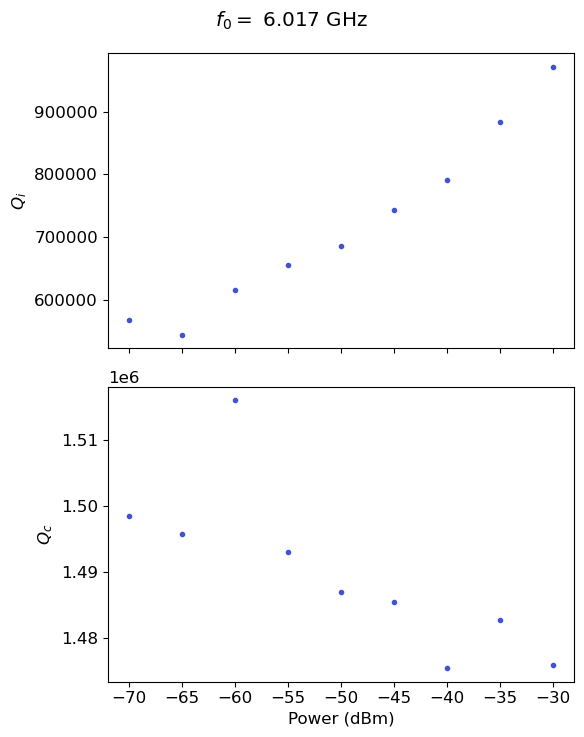

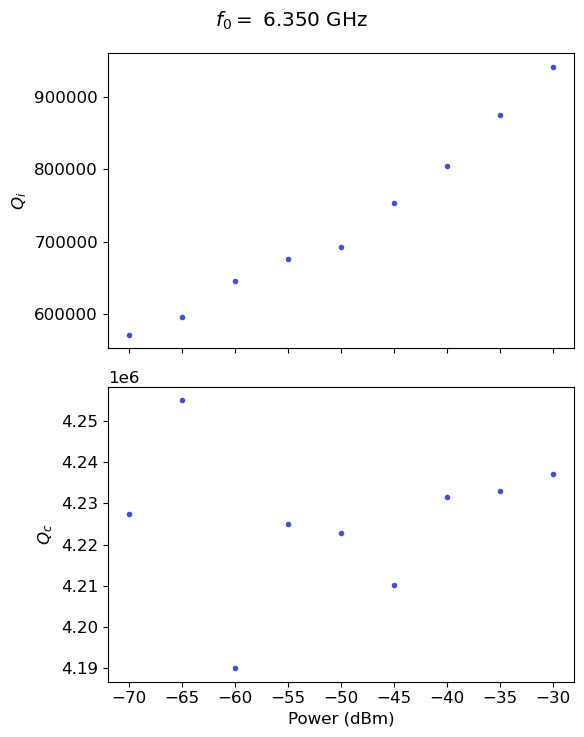

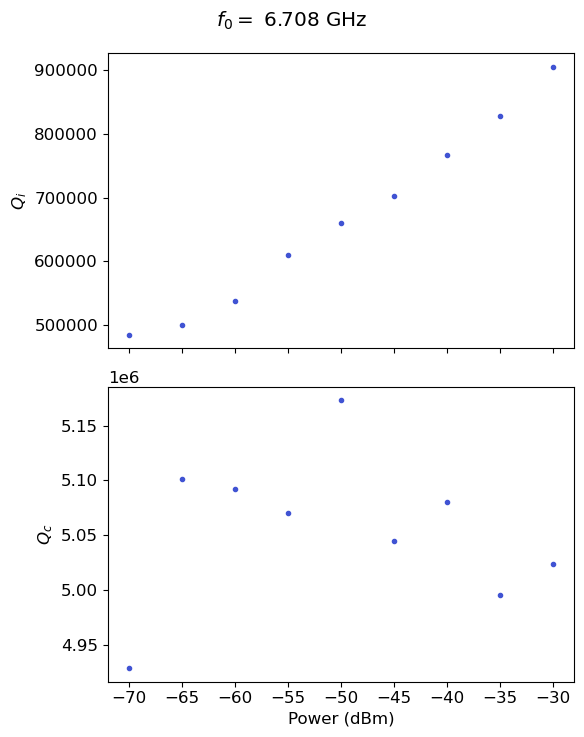

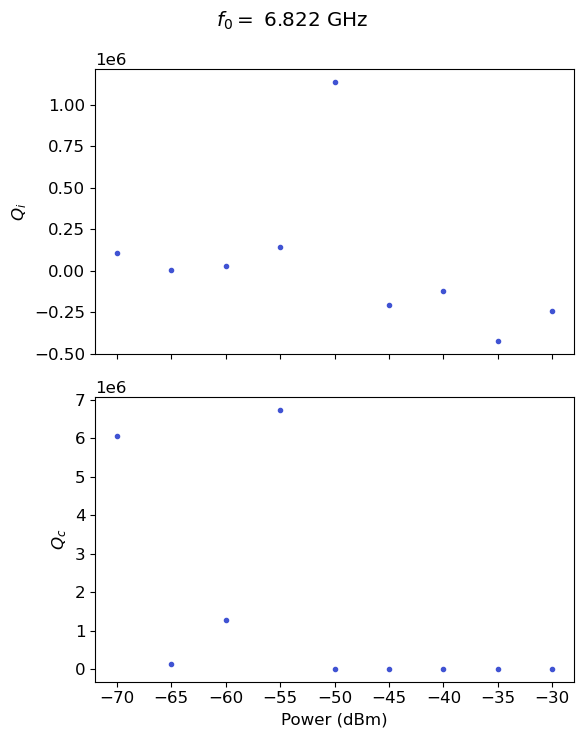

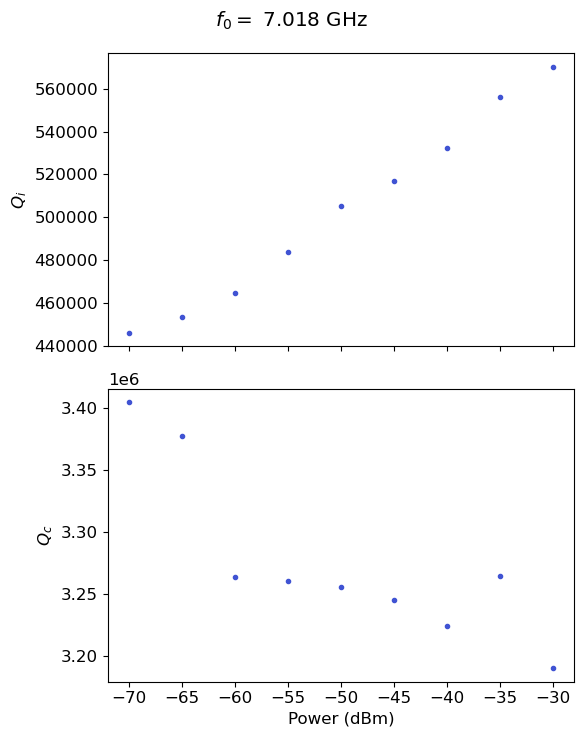

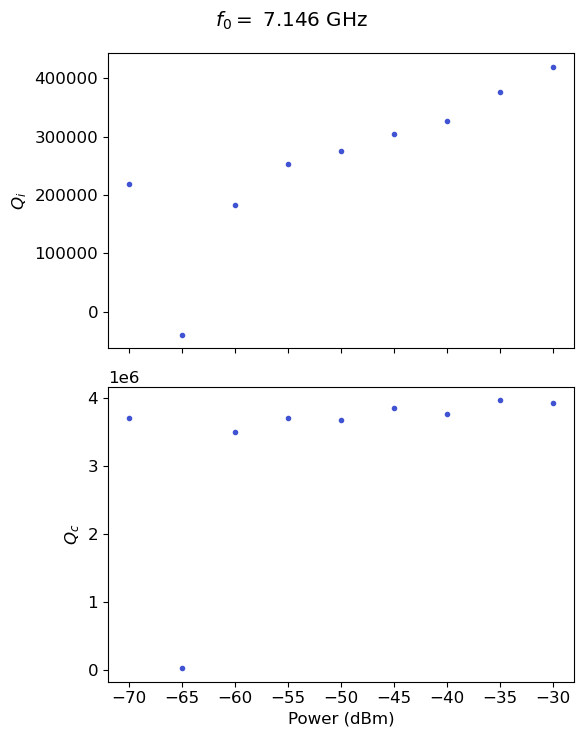

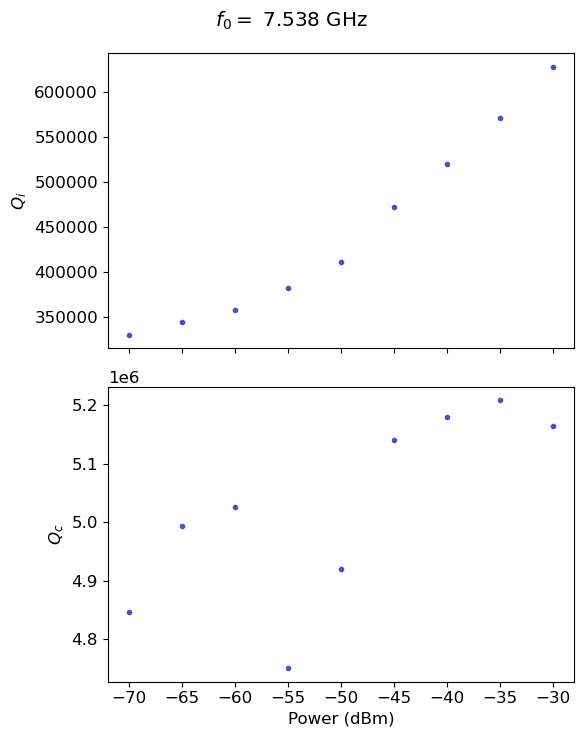

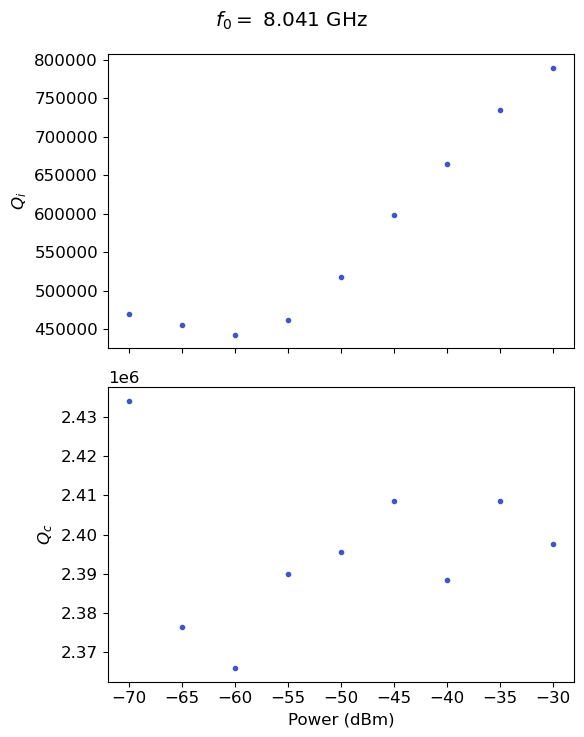

In [6]:
import cProfile

%matplotlib inline

pr = cProfile.Profile()
pr.enable()

res_params, file_list = ResonatorAnalyzer.analyze_sweep_gen(
    params['dir'][ind], 
    data_pth, 
    img_pth, 
    name=meas, 
    plot=False, 
    nfiles=params['nfiles'][ind], 
    meas_type=params['meas_type'][ind], 
    slope=slope, 
    fitphase=True
)

In [7]:
file_list

[[['res_6016571_70dbm',
   'res_6016571_65dbm',
   'res_6016571_60dbm',
   'res_6016571_55dbm',
   'res_6016571_50dbm',
   'res_6016571_45dbm',
   'res_6016571_40dbm',
   'res_6016571_35dbm',
   'res_6016571_30dbm'],
  ['res_6349648_70dbm',
   'res_6349648_65dbm',
   'res_6349648_60dbm',
   'res_6349648_55dbm',
   'res_6349648_50dbm',
   'res_6349648_45dbm',
   'res_6349648_40dbm',
   'res_6349648_35dbm',
   'res_6349648_30dbm'],
  ['res_6707620_70dbm',
   'res_6707620_65dbm',
   'res_6707620_60dbm',
   'res_6707620_55dbm',
   'res_6707620_50dbm',
   'res_6707620_45dbm',
   'res_6707620_40dbm',
   'res_6707620_35dbm',
   'res_6707620_30dbm'],
  ['res_6821934_70dbm',
   'res_6821934_65dbm',
   'res_6821934_60dbm',
   'res_6821934_55dbm',
   'res_6821934_50dbm',
   'res_6821934_45dbm',
   'res_6821934_40dbm',
   'res_6821934_35dbm',
   'res_6821934_30dbm'],
  ['res_7018287_70dbm',
   'res_7018287_65dbm',
   'res_7018287_60dbm',
   'res_7018287_55dbm',
   'res_7018287_50dbm',
   'res_7018

Resonator frequency: Counter({7145647: 9, 6349648: 9, 6707620: 9, 8041225: 9, 6016571: 9, 7537941: 9, 6821934: 9, 7018287: 9})
Resonator frequency: Counter({7145647: 9, 6349648: 9, 6707620: 9, 8041225: 9, 6016571: 9, 7537941: 9, 6821934: 9, 7018287: 9})
Files sorted by power: ['res_6016571_70dbm', 'res_6016571_65dbm', 'res_6016571_60dbm', 'res_6016571_55dbm', 'res_6016571_50dbm', 'res_6016571_45dbm', 'res_6016571_40dbm', 'res_6016571_35dbm', 'res_6016571_30dbm']
Files sorted by power: ['res_6349648_70dbm', 'res_6349648_65dbm', 'res_6349648_60dbm', 'res_6349648_55dbm', 'res_6349648_50dbm', 'res_6349648_45dbm', 'res_6349648_40dbm', 'res_6349648_35dbm', 'res_6349648_30dbm']
Files sorted by power: ['res_6707620_70dbm', 'res_6707620_65dbm', 'res_6707620_60dbm', 'res_6707620_55dbm', 'res_6707620_50dbm', 'res_6707620_45dbm', 'res_6707620_40dbm', 'res_6707620_35dbm', 'res_6707620_30dbm']
Files sorted by power: ['res_6821934_70dbm', 'res_6821934_65dbm', 'res_6821934_60dbm', 'res_6821934_55dbm',

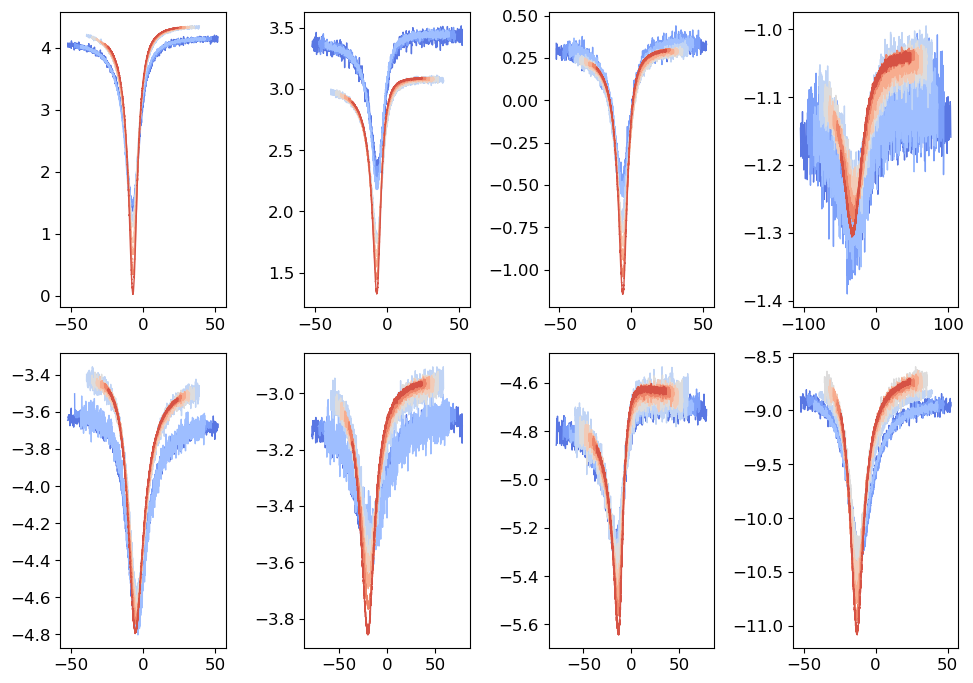

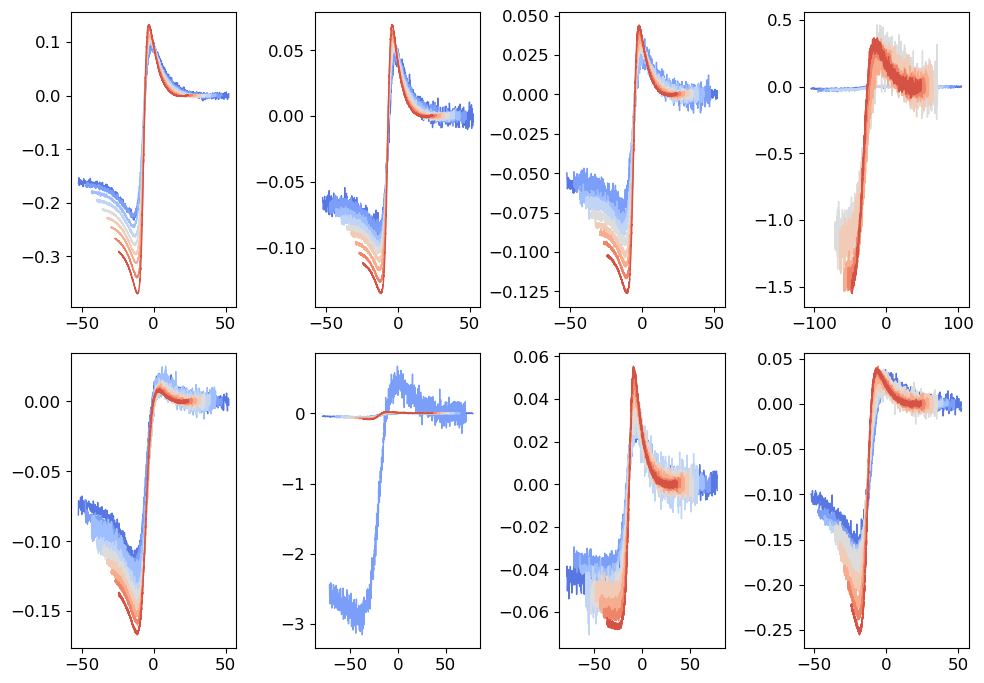

In [7]:
#slope=1135.027

%matplotlib inline
frac = 7.714986

fnames = ResonatorPlotter.plot_all(
    params['dir'][ind], 
    data_pth, 
    output_path=img_pth, 
    max_power=-15, 
    min_power=-80, 
    norm=False, 
    half_norm=False, 
    nfiles=params['nfiles'][ind], 
    meas_type=params['meas_type'][ind],
    slope=slope, 
    name=img_name
)  # slope=slope

In [8]:
#fnames, res_params = ana_res.analyze_sweep_other(params['dir'][ind], data_pth, output_path=img_pth, max_power=-15, nfiles=params['nfiles'][ind], meas_type=params['meas_type'][ind],slope=slope)#, slope=slope)

#### Reorder the data based on pitch (only run once)

In [19]:
if params['meas_type']=='soc':
    res_params = ResonatorAnalyzer.convert_power(res_params) 

params, res_params = ResonatorAnalyzer.reorder(params, res_params)  # only run once!
params['qc'] = np.array([np.nanmedian(res_params[i]['qc']) for i in range(len(res_params))])
params['qc_err'] = np.array([np.nanmedian(res_params[i]['qc_err']) for i in range(len(res_params))])
params['freqs'] = np.array([np.nanmedian(res_params[i]['freqs']) for i in range(len(res_params))])
params['phs'] = np.array([np.nanmedian(res_params[i]['phs']) for i in range(len(res_params))])

In [20]:
res_params[0]['qc'][0][2]=np.nan

with open('res_params.yaml', 'w') as file:
    for i in range(len(res_params)):
        rp = {key: value.tolist() if isinstance(value, np.ndarray) else value for key, value in res_params[0].items()}
        yaml.dump(rp, file)

In [11]:
res_params[4]['qi'][0][-7]=np.nan

In [ ]:
res_params

### Power sweep and TLS fits

Error in plotting: 'res_name'
Failed!
Failed!


AttributeError: module 'meas_analysis.handy' has no attribute 'save_np'

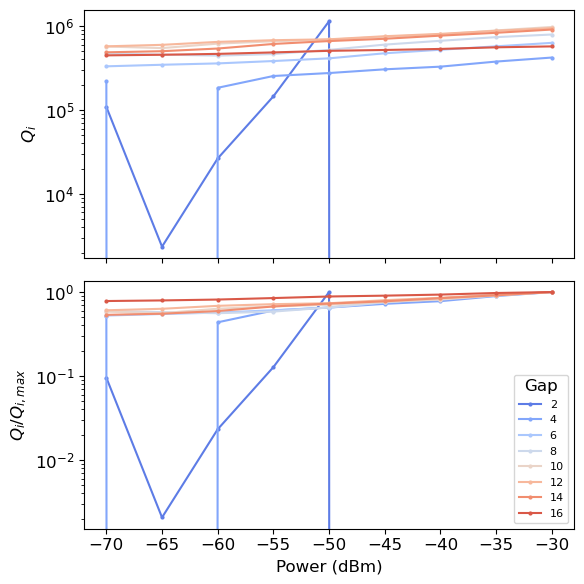

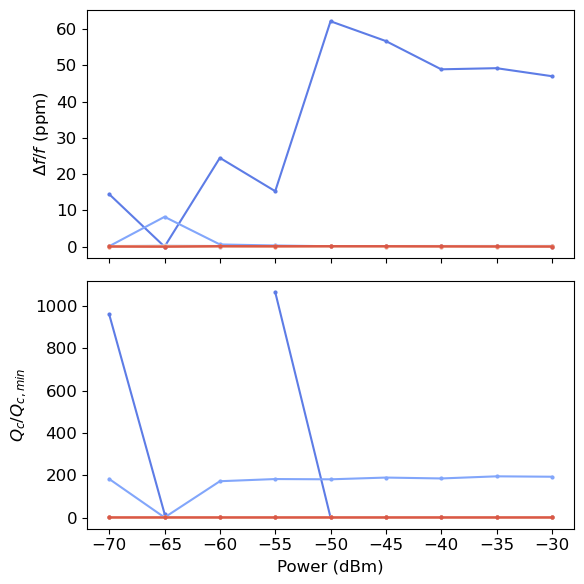

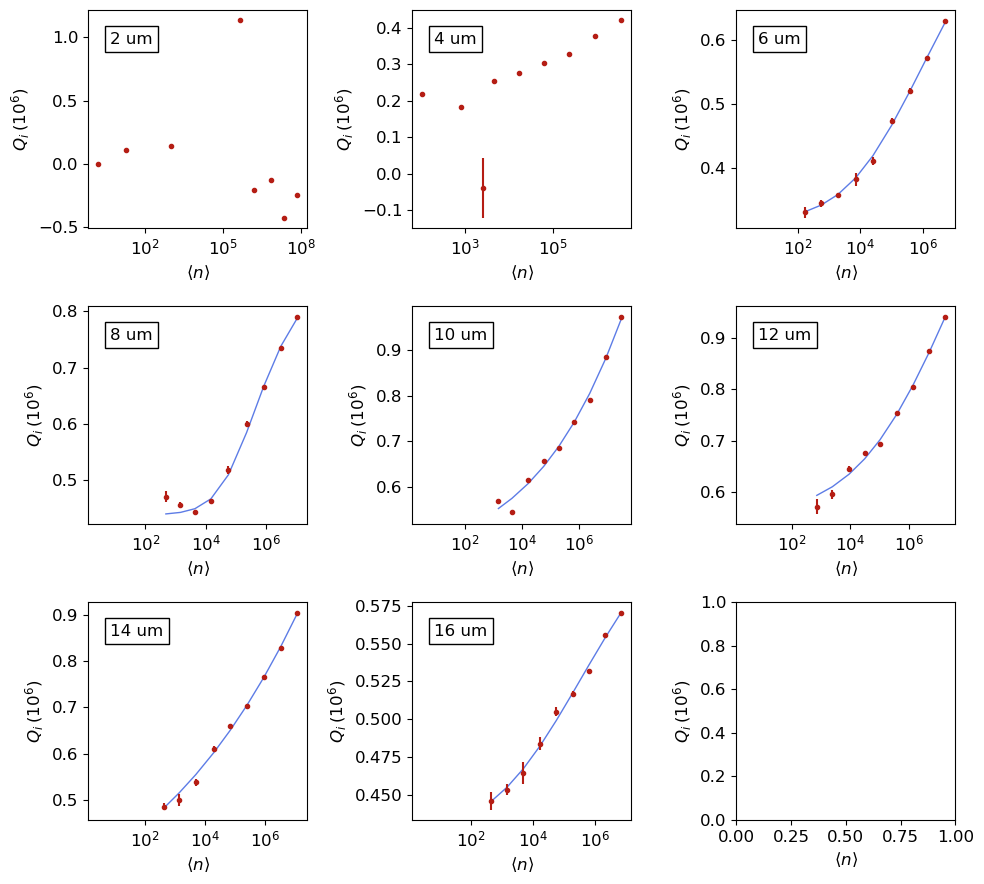

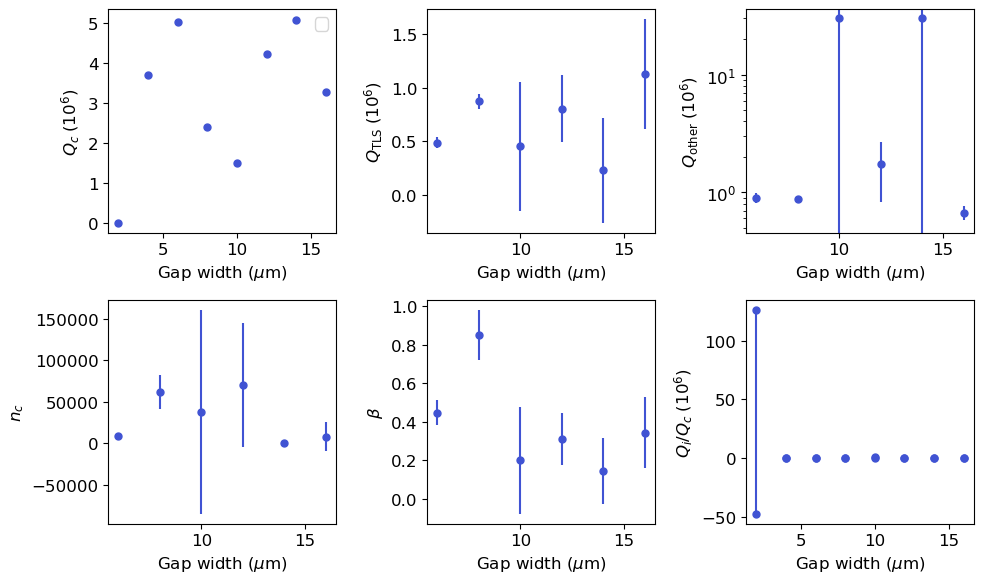

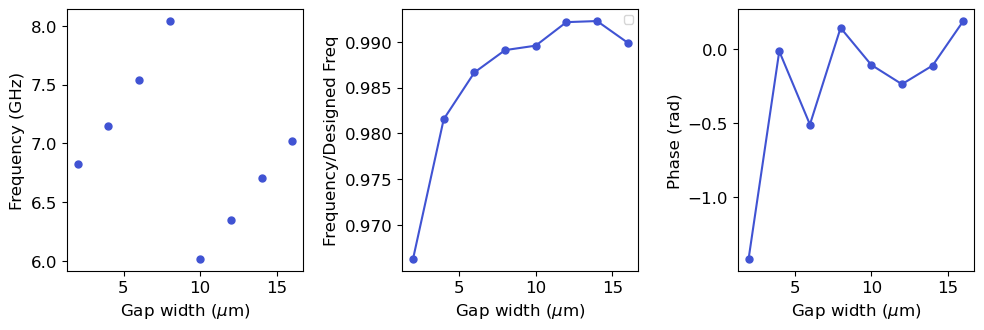

In [21]:
#%matplotlib widget
%matplotlib inline
ResonatorPlotter.plot_power(res_params, params, img_pth, use_pitch=True)

max_power = [10, 0, 0, 0,-15, -10, -10, 0]
#min_power = [-50, -80, -75, -75, -80, -80, -80, -75]
#min_power = [-80, -80, -80, -80, -90, -90, -75, -90]
min_power = [-70, -75, -80, -80, -90, -90, -90, -75]
#cfg = ana_tls.fit_qi(res_params, params, img_pth) 
cfg = ana_tls.fit_qi(res_params, params, img_pth, name=img_name, min_power_vec = min_power, max_power_vec = max_power) 
# params['qtls0'][2] = float('nan')
# params['qother'][2] = float('nan')

ana_tls.plot_res_pars([params], [''],img_pth, name=img_name)
ResonatorPlotter.plot_res_pars([params], [''], img_pth, name=img_name)
hy.save_np(params, img_pth+'Text/' +params['pth'][ind][0:-1] +params['meas'][ind] + '.yml')
#hy.save_np(res_params, img_pth+'Text/' +params['pth'][ind][0:-1] +params['meas'][ind] + '_ph.yml')

In [ ]:
res_params[i].keys()

In [ ]:
sns.set_palette('coolwarm',8)
fig, ax= plt.subplots(1,1)
for i in range(len(res_params)):
    ax.plot(res_params[i]['pow'][0],res_params[i]['qc'][0],'.-')

In [ ]:
pitch_list = params['pitch']
qtls0 = params['qtls0']
qtls0_err = params['qtls0_err']
qother = params['qother']
qother_err = params['qother_err']

%matplotlib inline
plt.errorbar(np.array(pitch_list)+0.2, qtls0, yerr = qtls0_err, fmt='.', label = 'Q_TLS0', capsize = 2)
plt.errorbar(pitch_list, qother, yerr = qother_err, fmt='.', label = 'Q_Other', capsize = 2)
plt.xlabel('Pitch size [um]')
plt.legend()
plt.ylim(-0.2*10**6, 1.3*10**6)
plt.show()

### Plot with different max and min power for each resonator 

In [ ]:
if sample == 'hf3':
    max_power = [-40, -50, -35, -40, -25, -25, -25, -25]

    cfg = ana_tls.fit_qi(res_params, params, img_pth, max_power_vec = max_power) 
    ana_tls.plot_res_pars([params], [''],img_pth)
    #params_nohf_low_pow = copy.deepcopy(params)
    params_hf = copy.deepcopy(params)
else:
    max_power = [-35, -35, -15, -25, -15, -15, -15, -15]
    min_power = [-115, -115, -115, -115, -100, -95, -90, -90]
    
    cfg = ana_tls.fit_qi(res_params, params, img_pth, max_power_vec = max_power, min_power_vec = min_power) 
    ana_tls.plot_res_pars([params], [''],img_pth)
    params_no_hf = copy.deepcopy(params)

### Print out info for running scans

In [ ]:
lw=[]
freq =[]
print('linewidth')
for i in range(len(params['freqs'])):
    q = 1/(1/params['qi0'][i]+1/params['qc'][i])
    lw.append(params['freqs'][i]/q)
    freq.append(params['freqs'][i])

print(lw)
print(freq)

In [ ]:
%matplotlib widget
#pnames = ['240814-2','240725','240729-2', '240729-4']
#labs = ['ScalinQ (No HF)', 'SLab (No HF)', 'SLab (HF)', 'RFSoC (HF)'] 

#pnames = ['240729-2', '240729-3']
pnames = ['240729-3', '240820_soc']
labs = ['VNA (HF)', 'RFSoC (HF)'] 
plist =[]
for p in pnames:
    plist.append(hy.load(img_pth +'Text/'+ p + '.yml'))

ana_tls.plot_res_pars(plist, labs,img_pth)
ResonatorPlotter.plot_res_pars(plist, labs,img_pth)

## Single resonators

### Get list of resonators

In [ ]:
# Grab list of resonators following corect format in directory. 

pattern0 = r'res_(\d+)_\d{2,5}dbm'
resonators, file_list0 = ResonatorData.get_resonators(directories[0], pth, pattern0)

pattern = 'res_{:d}_'.format(resonators[0]) + '(\d{2,3})dbm'
file_list = ResonatorData.get_resonator_power_list(pattern, file_list0)

### Fit slope for RFSoC phase correction

In [ ]:
pth = r'/Users/sph/Library/CloudStorage/GoogleDrive-circuitqed@gmail.com/My Drive/Projects/Materials/Data/240816-Resonator'

plt.figure()
data, attrs = hy.prev_data(pth, 'test2')
plt.plot(data['xpts'][0], data['phases'][0])
slope, ofs = np.polyfit(data['xpts'][0], np.unwrap(data['phases'][0]), 1)
data['phases'] = np.unwrap(data['phases'][0]) - slope * data['xpts'][0]-ofs

print(slope)

data['phases']

In [ ]:
# Grab list of resonators following corect format in directory. 

pth = r'/Users/sph/Library/CloudStorage/GoogleDrive-circuitqed@gmail.com/My Drive/Projects/Materials/Data/240818-Resonator/'

#directories = ['240816-Resonator/powersweep3']
directories = ['powersweep2']
pattern0 = r'res_(\d+)_\d'
resonators, file_list = ResonatorData.get_resonators(directories[0], pth, pattern0)

In [16]:
params['dir'][0][0]

'ResAsample1_power_sweep_7/'

In [22]:
data_pth + params['dir'][0][0],file_list[0][0][-1]

('/Users/sph/Library/CloudStorage/GoogleDrive-circuitqed@gmail.com/Shared drives/SLab/JJ_fab/Coherence Sample/022125_Resonator/ResAsample1_power_sweep_7/',
 'res_6016571_30dbm')

In [ ]:
data, attrs = hy.prev_data(data_pth + params['dir'][0][0],file_list[4][0][-1])


In [27]:
file_list[0][7][-1]

'res_8041225_30dbm'

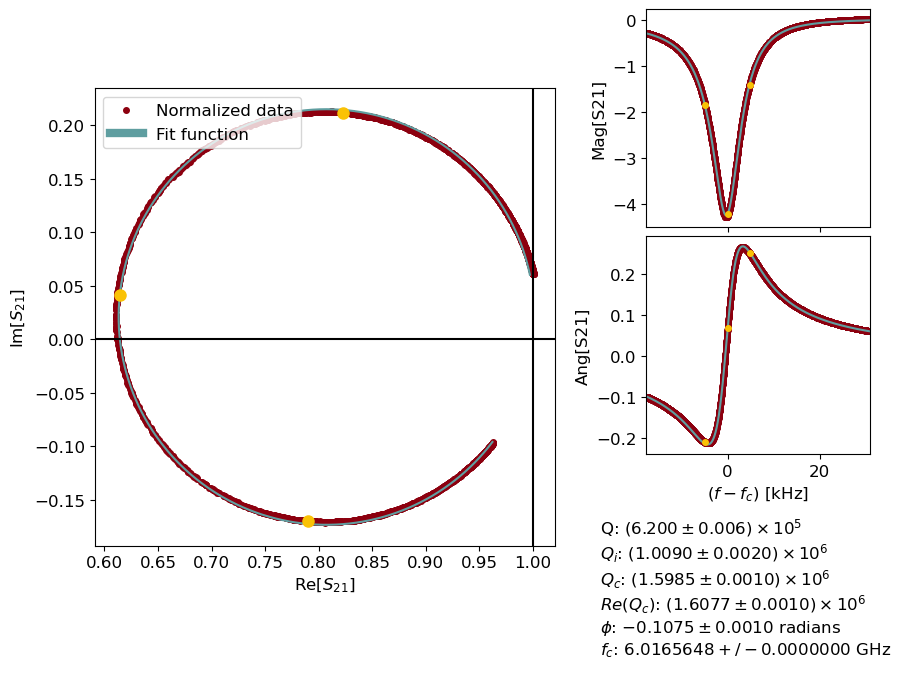

In [ ]:
data, attrs = ResonatorData.grab_data(data_pth+params['dir'][0][0], file_list[0][0][-1], 'vna')
#ResonatorPlotter.plot_raw_data(data)

data, attrs = hy.prev_data(path, fname)

# Reformat data for scres package
data["phases"] = np.unwrap(data["phases"][0])
#data["phases"] = ResonatorData.check_phase(data["phases"])
data["freqs"] = data["fpts"][0]
data["amps"] = data["mags"][0]
output = ResonatorFitter.fit_resonator(data,  file_list[0][0][-1], img_pth, plot=True)

In [ ]:
import os
file_list[0]
fname =  'res_6423_4096_wideright'
data, attrs = hy.prev_data(pth+directories[0], fname)

data.keys()
files = os.listdir('C:\\_python\\')
print(files)

Single resonator

In [ ]:
data, attrs = ResonatorData.grab_data(pth+directories[0], file_list[4], 'soc', slope=slope)
#ResonatorPlotter.plot_raw_data(data)
output = ResonatorFitter.fit_resonator(data, fname, img_pth, plot=True)   

In [ ]:
sorted_file_list = sorted(file_list)
print(sorted_file_list)

In [ ]:
file_list[12]

In [ ]:
%matplotlib widget

for i in range(len(file_list)):
    #try:
    data, attrs = ResonatorData.grab_data(pth+directories[0], file_list[i])       
    ResonatorPlotter.plot_raw_data(data)
    #output = ResonatorFitter.fit_resonator(data, file_list[i], output_path, 'png')    
    #except: 
    #    print('fit failed')  

In [ ]:
7.714986

In [ ]:
pth = '../../../../JJ_fab/Coherence Sample/Resonators Measurement/240725/data/power_sweep5'
fname = 'res_7083855_60dbm_wide'
data, attrs = ResonatorData.grab_data(pth, fname)
output = ResonatorFitter.fit_resonator(data, fname, img_pth, plot=True)   
ResonatorPlotter.plot_raw_data(data)

## Temp sweep

In [ ]:
# Initialize the directories list for a temperature sweep 
temps, directories = ResonatorData.get_temp_list(pth_base, max_temp=1500)
res_params = ResonatorAnalyzer.analyze_sweep_gen(directories, base_path, img_path)

ResonatorPlotter.plot_power_temp(res_params, i, params, img_pth)